In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

In [2]:
nrgvsecon=pd.read_csv("africanrgvsgdrp.csv",index_col=[0])
nrgvsecon.shape

(52, 12)

### Electricity Generation Sources in each country

We will start by seeing the different electricity generation sources in different countries

In [3]:
nrgvsecon.head(5)

,country,population,real gdp per capita $,installed capacity kW,fossil fuels,nuclear,solar,wind,hydroelectricity,tide and wave,geothermal,biomass and waste
0,nigeria,225082083.0,4900.0,11691000.0,78.1,0.0,0.2,0.0,21.7,0.0,0.0,0.1
1,egypt,107770524.0,12000.0,59826000.0,88.7,0.0,1.0,2.5,7.7,0.0,0.0,0.2
2,south-africa,57516665.0,11500.0,62728000.0,87.9,5.2,1.6,2.6,2.5,0.0,0.0,0.2
3,algeria,44178884.0,10700.0,21694000.0,98.9,0.0,0.9,0.0,0.1,0.0,0.0,0.0
4,morocco,36738229.0,6900.0,14187000.0,81.6,0.0,1.1,13.0,4.4,0.0,0.0,0.0


In [4]:
import matplotlib as mpl

mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

In [5]:
nrgvsecon.iloc[0]

country                      nigeria
population               225082083.0
real gdp per capita $         4900.0
installed capacity kW     11691000.0
fossil fuels                    78.1
nuclear                          0.0
solar                            0.2
wind                             0.0
hydroelectricity                21.7
tide and wave                    0.0
geothermal                       0.0
biomass and waste                0.1
Name: 0, dtype: object

We will use bar charts to compare different electricity generation sources.ie. `plt.bar()`

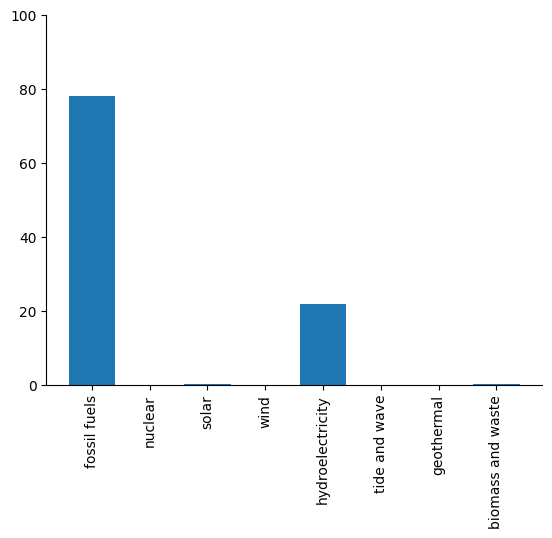

In [6]:
x=nrgvsecon.iloc[0].index[4:]
y=nrgvsecon.iloc[0].values[4:]
orderedy=nrgvsecon.iloc[0].value_counts().index
plt.bar(x,y)
plt.xticks(rotation=90)
plt.ylim(0,100)


plt.show()

We can see the comparisons of each electricity generation source in a country( in this case, Nigeria). 

Now, a better way to visualize this would be the bar charts in some order.e.g. the highest sources to the lowest.

In [7]:
# argsort returns an array of indices in order ascending order
order=np.argsort(nrgvsecon.iloc[0].values[4:])

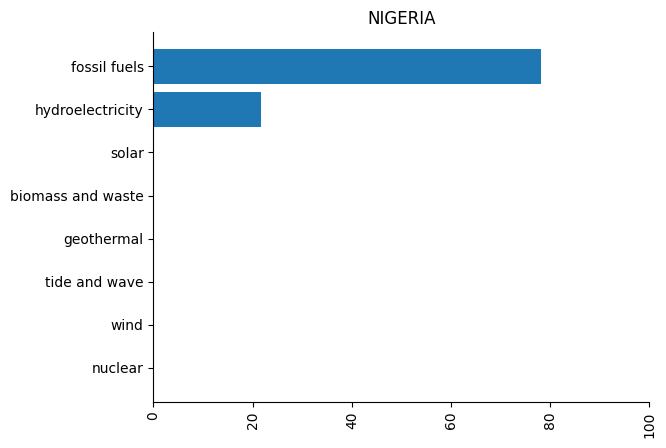

In [8]:
# barh will plot a horizontal bar instead of a vertical one
x=nrgvsecon.iloc[0].index[4:][order]
y=nrgvsecon.iloc[0].values[4:][order]
orderedy=nrgvsecon.iloc[0].value_counts().index
fig=plt.barh(x,y)
plt.xticks(rotation=90)
plt.xlim(0,100)
plt.title(nrgvsecon['country'][0].upper())

plt.show()

Another interesting and more clear way to do things would be to have the percent appear at the end of each bar. 

We can use `plt.text` to do this

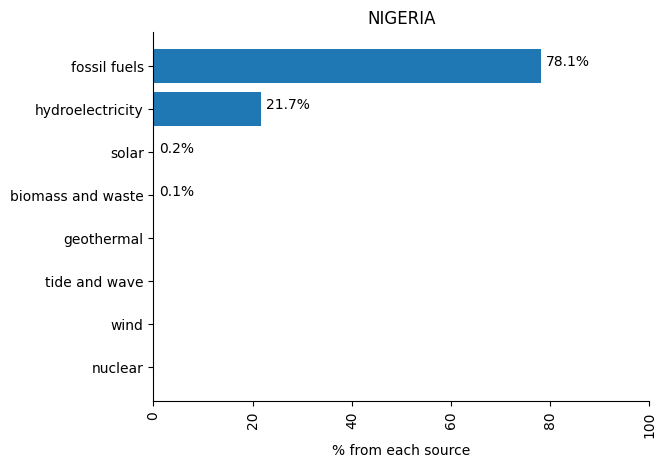

In [9]:
x=nrgvsecon.iloc[0].index[4:][order]
y=nrgvsecon.iloc[0].values[4:][order]
orderedy=nrgvsecon.iloc[0].value_counts().index
fig=plt.barh(x,y)
plt.xticks(rotation=90)
plt.xlim(0,100)
plt.xlabel("% from each source")
plt.title(nrgvsecon['country'][0].upper())
for i in range(len(y)):
    if y[i]!=0:
        plt.text(y[i]+1, i,f"{y[i]}%")

plt.show()

In [10]:
# test
# nrgvsecon[nrgvsecon['country'].str.contains('kenya')].iloc[0][2:].index

The information on this bar chart is really clear.

We can see what the percentage contribution from each electricity generation source is!

Let's create a function to get this information from any country.

In [11]:
def plotpercountry(countries):
    for country in countries:
        order=np.argsort(nrgvsecon[nrgvsecon['country'].str.contains(country)].iloc[0].values[4:])
        y=nrgvsecon[nrgvsecon['country'].str.contains(country)].values[0][4:][order]
        x=nrgvsecon[nrgvsecon['country'].str.contains(country)].iloc[0][4:].index[order]
        plt.barh(x,y)
        plt.xlim(0,100)
        plt.xlabel("% from each source")
        plt.title(country.upper())
        for i in range(len(y)):
            if y[i]!=0:
                plt.text(y[i]+1, i,f"{y[i]}%")
        plt.show()
        

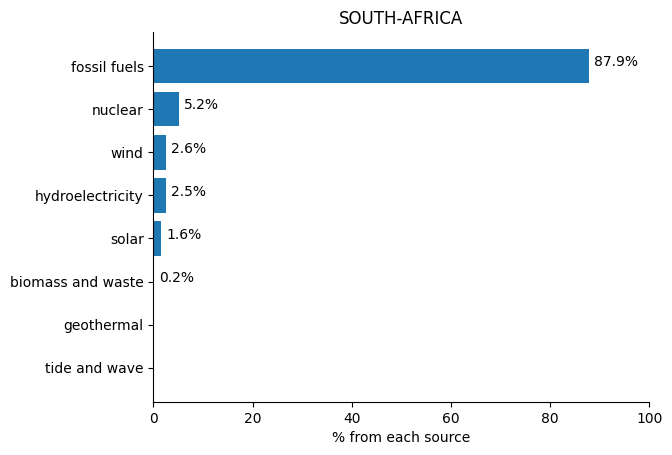

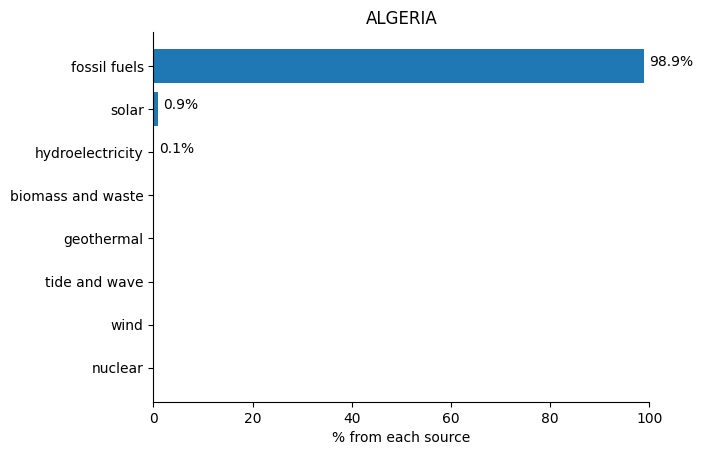

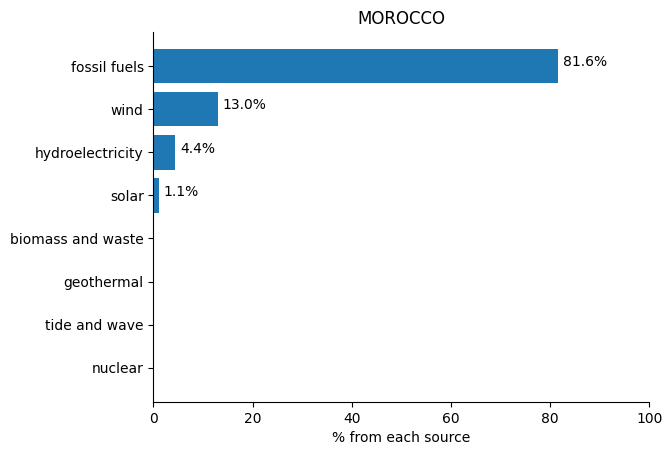

In [12]:
plotpercountry(nrgvsecon.country.values[2:5])

In [13]:
nrgvsecon.head(10)

,country,population,real gdp per capita $,installed capacity kW,fossil fuels,nuclear,solar,wind,hydroelectricity,tide and wave,geothermal,biomass and waste
0,nigeria,225082083.0,4900.0,11691000.0,78.1,0.0,0.2,0.0,21.7,0.0,0.0,0.1
1,egypt,107770524.0,12000.0,59826000.0,88.7,0.0,1.0,2.5,7.7,0.0,0.0,0.2
2,south-africa,57516665.0,11500.0,62728000.0,87.9,5.2,1.6,2.6,2.5,0.0,0.0,0.2
3,algeria,44178884.0,10700.0,21694000.0,98.9,0.0,0.9,0.0,0.1,0.0,0.0,0.0
4,morocco,36738229.0,6900.0,14187000.0,81.6,0.0,1.1,13.0,4.4,0.0,0.0,0.0
5,angola,34795287.0,6200.0,7344000.0,28.4,0.0,0.1,0.0,70.1,0.0,0.0,1.4
6,kenya,55864655.0,4200.0,3304000.0,8.3,0.0,1.0,10.7,32.6,0.0,46.2,1.2
7,ethiopia,113656596.0,2300.0,4856000.0,0.0,0.0,0.1,3.8,95.8,0.0,0.0,0.3
8,tanzania,63852892.0,2600.0,1623000.0,65.0,0.0,1.3,0.0,32.8,0.0,0.0,1.0
9,ghana,33107275.0,5300.0,5312000.0,63.8,0.0,0.3,0.0,35.9,0.0,0.0,0.1


### Comparing energy sources

Now, we can compare the percentage of energy that Africa produces, and from which each source it comes from. 

Let's try do this using a pie chart, and a bar chart.

In [14]:
# this find the sum of every column
nrgvsecon.sum(numeric_only=True)

population               1.394572e+09
real gdp per capita $    2.809000e+05
installed capacity kW    2.433790e+08
fossil fuels             3.099700e+03
nuclear                  5.200000e+00
solar                    7.930000e+01
wind                     6.640000e+01
hydroelectricity         1.825700e+03
tide and wave            0.000000e+00
geothermal               4.620000e+01
biomass and waste        7.870000e+01
dtype: float64

In [15]:
# the sum of the column- installed capacity
totalcapacity=nrgvsecon['installed capacity kW'].sum()

In [16]:
# sum of energy produced by fossil fuels over the total energy produced, to find the percentage
(np.sum(nrgvsecon['installed capacity kW']*nrgvsecon['fossil fuels']/100))/(nrgvsecon['installed capacity kW'].sum())

0.7685277612283722

In [17]:
sources=['fossil fuels','biomass and waste','wind','solar','nuclear','hydroelectricity','geothermal']

In [18]:
# a function to calculate totals from all sources
def sumcapacity(sources):
  capacities=[]
  for source in sources:
    capacities.append((np.sum(nrgvsecon['installed capacity kW']*nrgvsecon[source]/100))/totalcapacity)
  return capacities

In [19]:
capas=(sumcapacity(sources))

Let's create a [simple pie chart]("https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html").

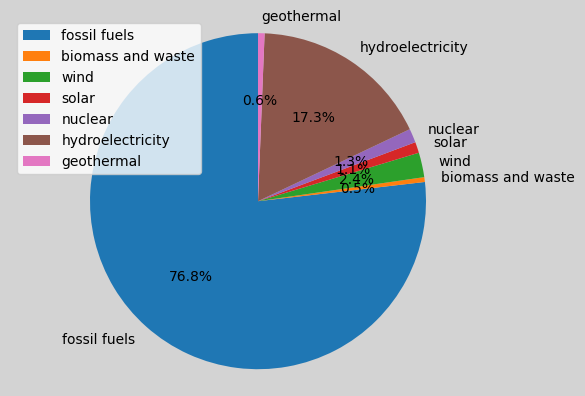

In [20]:
fig1, ax1 = plt.subplots()
ax1.pie(capas, labels=sources, autopct='%1.1f%%',
         startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig1.set_facecolor('lightgrey')
ax1.legend()

plt.show()

We can clearly see that the highest percentages come from fossil fuels and hydroelectricity. 

One question to ask at this point would be whether gdp could still be correlated with electricity generation sources.

For clarity, let's do this again with a bar chart

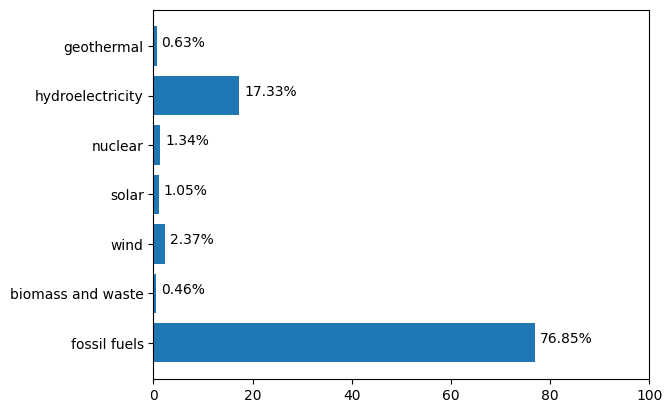

In [21]:
mpl.rcParams['axes.spines.top'] = True
mpl.rcParams['axes.spines.right'] = True
plt.barh(sources,(np.array(capas)*100))
plt.xlim(0,100)
for i in range(len(capas)):
    if capas[i]!=0:
        plt.text(capas[i]*100+1, i,f"{(capas[i]*100):.2f}%")
plt.show()

### gdp

Can we draw some insights on where African gdp's per capita lie? We will use a histogram in this case: `plt.hist` and for seaborn `sns.displot`

In [22]:
nrgvsecon.head()

,country,population,real gdp per capita $,installed capacity kW,fossil fuels,nuclear,solar,wind,hydroelectricity,tide and wave,geothermal,biomass and waste
0,nigeria,225082083.0,4900.0,11691000.0,78.1,0.0,0.2,0.0,21.7,0.0,0.0,0.1
1,egypt,107770524.0,12000.0,59826000.0,88.7,0.0,1.0,2.5,7.7,0.0,0.0,0.2
2,south-africa,57516665.0,11500.0,62728000.0,87.9,5.2,1.6,2.6,2.5,0.0,0.0,0.2
3,algeria,44178884.0,10700.0,21694000.0,98.9,0.0,0.9,0.0,0.1,0.0,0.0,0.0
4,morocco,36738229.0,6900.0,14187000.0,81.6,0.0,1.1,13.0,4.4,0.0,0.0,0.0


In [23]:
# np.log10(nrgvsecon['real gdp per capita $'].describe())

In [24]:
# 10**np.arange(2.7,4.4+0.1,0.1)

In [25]:
bins=10**np.arange(2.7,4.4+0.1,0.1)
ticks=[1000,3000,10000,30000]

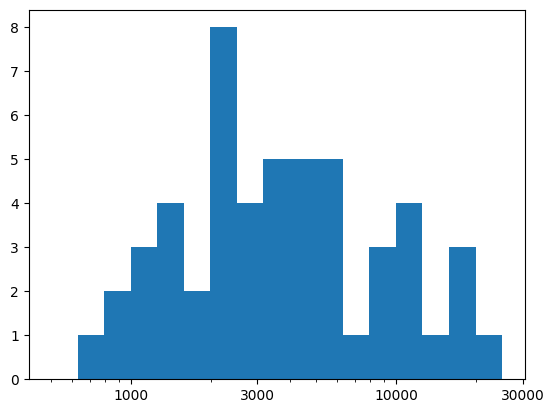

In [26]:
labels=[f'{v}' for v in ticks]
plt.hist(data = nrgvsecon, x='real gdp per capita $',bins=bins)
plt.xscale('log');
plt.xticks(ticks,labels);

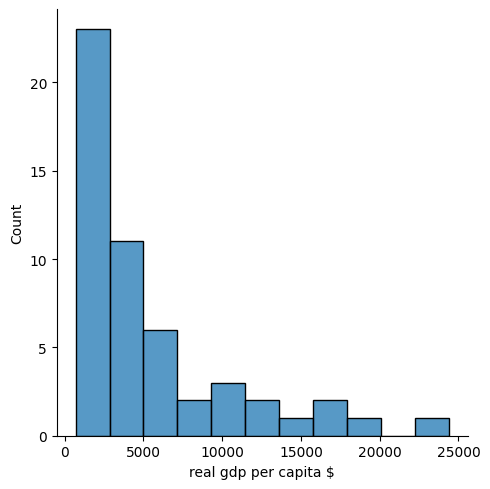

In [27]:
sns.displot(nrgvsecon['real gdp per capita $']);

It looks like most African countries(more than half) have their real gpd per capita below $ 5000. 

What other questions might we have? Do countries with low gdp rely on fossil fuels? Again, is there a correlation between the two?

In [28]:
nrgvsecon.sort_values('installed capacity kW').head()

,country,population,real gdp per capita $,installed capacity kW,fossil fuels,nuclear,solar,wind,hydroelectricity,tide and wave,geothermal,biomass and waste
51,sao-tome-and-principe,217164.0,4100.0,28000.0,89.5,0.0,0.0,0.0,10.5,0.0,0.0,0.0
49,guinea-bissau,2026778.0,1800.0,28000.0,97.6,0.0,2.4,0.0,0.0,0.0,0.0,0.0
50,comoros,876437.0,3100.0,35000.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45,central-african-republic,5454533.0,900.0,38000.0,0.7,0.0,0.0,0.0,99.3,0.0,0.0,0.0
44,lesotho,2193970.0,2300.0,74000.0,0.0,0.0,0.2,0.0,99.8,0.0,0.0,0.0


## Assignment starts here

We can find the correlation between two variables using `scipy.stats`. We imported this module at the beginning of the notebook. It contains functions that compute all the statistics for us! 

For example, let's see the [spearman rank correlation]("https://statistics.laerd.com/statistical-guides/spearmans-rank-order-correlation-statistical-guide.php") between installed capacity and gdp per capita. 

(This may seem like a lot of jargon, but basically, what the [function]("https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html") will return is two numbers. The closer the first number(the correlation) is to 1 or -1, the more the variables are alike, otherwise, the closer it is to 0, the less the variables are alike)

In [29]:
stats.spearmanr(nrgvsecon['installed capacity kW'],nrgvsecon['real gdp per capita $'])

SpearmanrResult(correlation=0.42678686304592384, pvalue=0.0016038790372016702)

A correlation of 0.43 isn't a strong correlation. What if we plotted these two against each other?

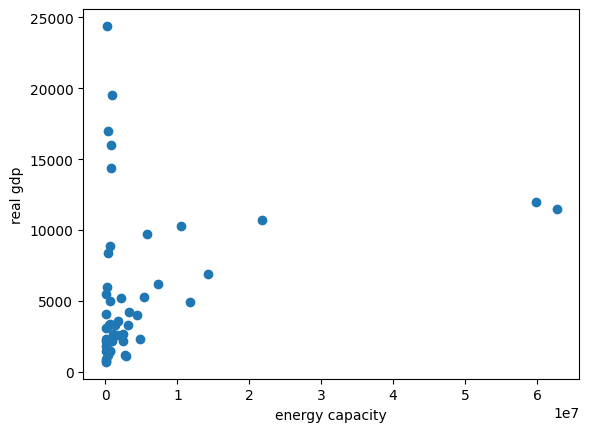

In [30]:
x=nrgvsecon['installed capacity kW']
y=nrgvsecon['real gdp per capita $']

plt.xlabel('energy capacity')
plt.ylabel('real gdp')
plt.scatter(x,y);

From the scatterplot, would you say that a correlation exists?

From observations;
   * Fewer countries with high energy capacity
   * Countries with a higher GDP have little energy capacity

Hence no direct correlation between GDP and energy capacity

### Taking population to account

The plot above almost clearly indicates that there is no/a very small correlation between **total energy produced** and **gdp per capita**. This is due to several factors. Some countries, such as Seychelles, have extremely high gdp per capita, due to their low population. The total energy capacity, however, doesn't take population into account. How can we do this, with the data we have, for every country?

In [31]:
pop_energy_gdp = nrgvsecon[["population", "real gdp per capita $", "installed capacity kW"]]
pop_energy_gdp_corr = pop_energy_gdp.corr()
pop_energy_gdp_corr

,population,real gdp per capita $,installed capacity kW
population,1.000000,-0.096715,0.417738
real gdp per capita $,-0.096715,1.000000,0.284878
installed capacity kW,0.417738,0.284878,1.000000


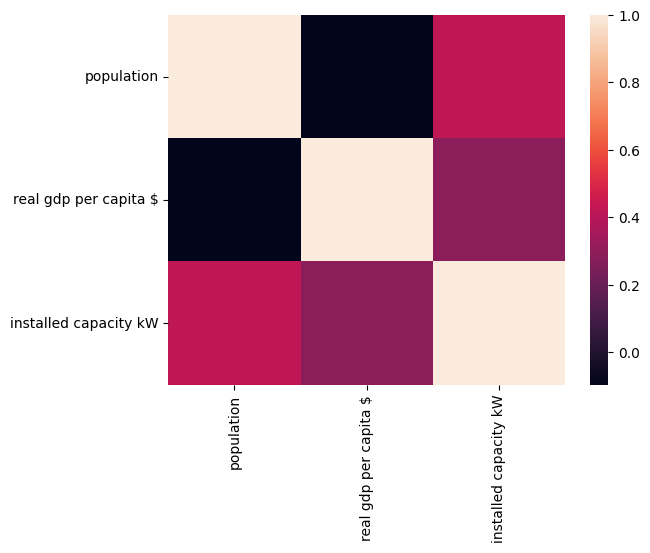

In [32]:
import seaborn as sns
sns.heatmap(pop_energy_gdp_corr);

Can we find the correlation between the gdp per capita, and the variable that takes population into account? 

Hint: how did we do this above?(Apart from the spearman's rank correlation, try search for other ways to find correlation, and see how these fair.e.g.  [Pearson correlation]("https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html"))

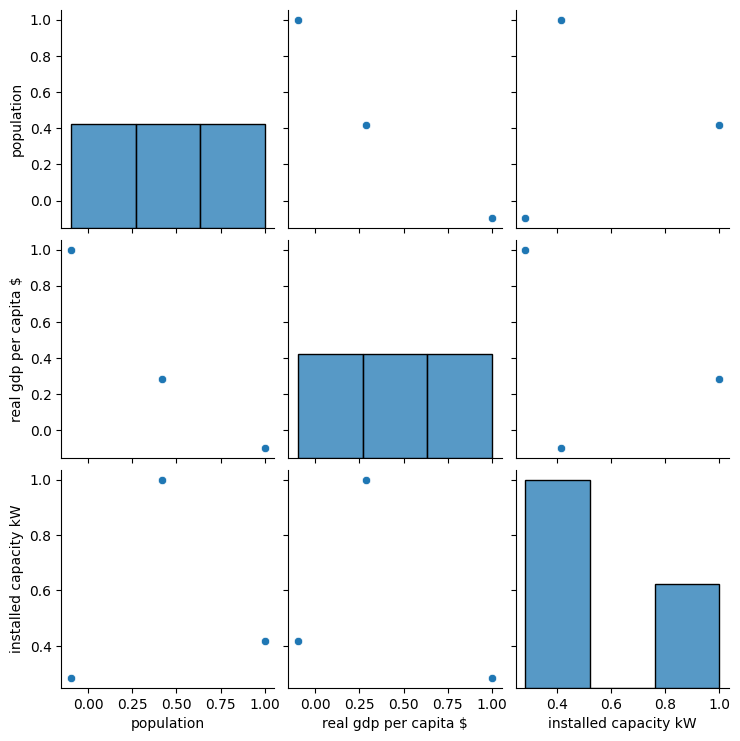

In [33]:
sns.pairplot(pop_energy_gdp_corr);

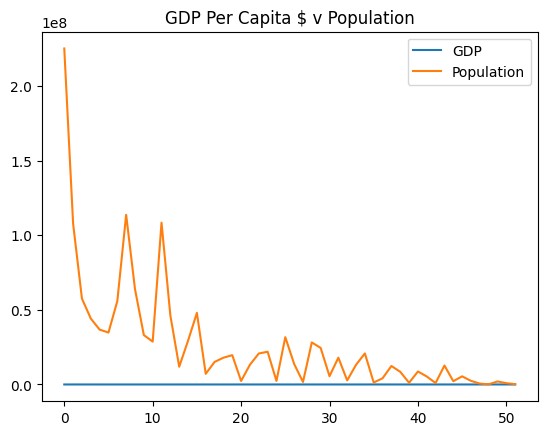

In [34]:
plt.plot(nrgvsecon["real gdp per capita $"], label="GDP")
plt.plot(nrgvsecon["population"], label="Population")
plt.title("GDP Per Capita $ v Population")
plt.legend();

Can you plot the two variables against one another; gdp against the 'other variable'

Hint: We mentioned this in class

Remember to label the axis

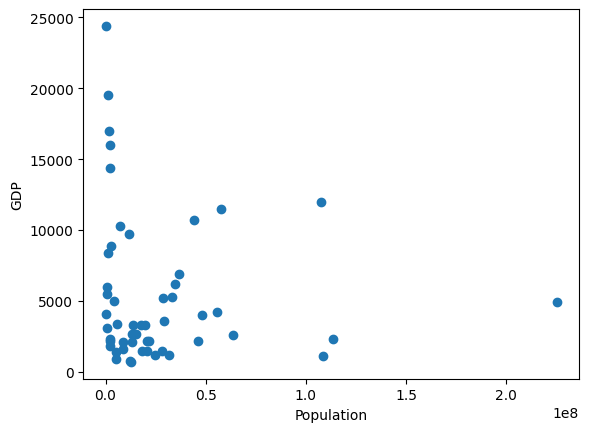

In [35]:
x=nrgvsecon['population']
y=nrgvsecon['real gdp per capita $']

plt.xlabel('Population')
plt.ylabel('GDP')
plt.scatter(x,y);

Now, there are some outliers in our data, like South Africa, who produce a high amount of electricity, some of which goes to export, and Libya, who export a lot of fossil fuel despite their low population, causing high gdp per capita, among others.

Can we find a method to get rid of outliers like these? 

Create new variables, that remove the outliers' data, and see whether the correlation is stronger, or weaker.

In [36]:
nrgvsecon.head()

,country,population,real gdp per capita $,installed capacity kW,fossil fuels,nuclear,solar,wind,hydroelectricity,tide and wave,geothermal,biomass and waste
0,nigeria,225082083.0,4900.0,11691000.0,78.1,0.0,0.2,0.0,21.7,0.0,0.0,0.1
1,egypt,107770524.0,12000.0,59826000.0,88.7,0.0,1.0,2.5,7.7,0.0,0.0,0.2
2,south-africa,57516665.0,11500.0,62728000.0,87.9,5.2,1.6,2.6,2.5,0.0,0.0,0.2
3,algeria,44178884.0,10700.0,21694000.0,98.9,0.0,0.9,0.0,0.1,0.0,0.0,0.0
4,morocco,36738229.0,6900.0,14187000.0,81.6,0.0,1.1,13.0,4.4,0.0,0.0,0.0


In [ ]:
# Use the Z-score method to identify outliers
z = np.abs(stats.zscore(data))
threshold = 3
outliers = np.where(z > threshold)

# Remove the outliers from the dataset
clean_data = data[~np.isin(range(len(data)), outliers)]

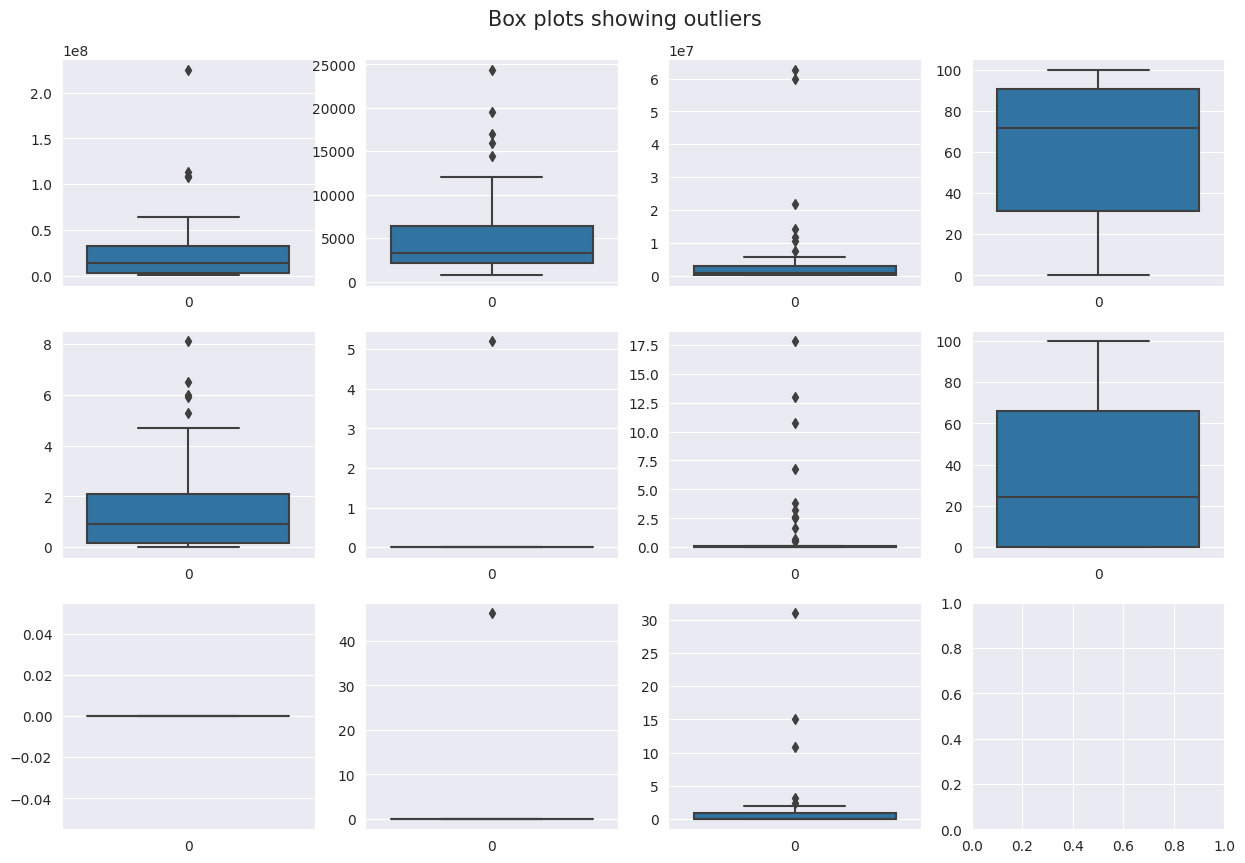

In [37]:
# Plotting boxplots for each of the numerical columns
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows = 3, ncols = 4, figsize = (15, 10))
fig.suptitle('Box plots showing outliers', y= 0.93, fontsize = 15)

for ax, data, name in zip(axes.flatten(), nrgvsecon, ['population','real gdp per capita $', 
                                                      'installed capacity kW','fossil fuels', 'solar', 'nuclear',
                                                     'wind', 'hydroelectricity', 'tide and wave', 'geothermal',
                                                     'biomass and waste']):
    sns.boxplot(nrgvsecon[name], ax = ax)

* All have outliers except "hydroelectricity", "tide and wave", "fossil fuels"

In [38]:
# We will use Quantile Flooring and Capping
print(nrgvsecon["population"].quantile(0.10))
print(nrgvsecon["population"].quantile(0.90))

1140407.1
57351464.0


In [39]:
nrgvsecon["population"].describe()

count    5.200000e+01
mean     2.681869e+07
std      3.913776e+07
min      9.701700e+04
25%      2.648908e+06
50%      1.349626e+07
75%      3.204675e+07
max      2.250821e+08
Name: population, dtype: float64

In [40]:
nrgvsecon["population"] = np.where(nrgvsecon["population"]<1140407.1, 1140407.1, nrgvsecon["population"])
nrgvsecon["population"] = np.where(nrgvsecon["population"]>57351464.0, 57351464.0, nrgvsecon["population"])
# calculate the skewness
print(nrgvsecon["population"].skew())

0.8217679481122612


In [41]:
# Dropping the outlier data points
index = nrgvsecon[(nrgvsecon['population'] >= 2.250821e+08)|(nrgvsecon['population'] <= 9.701700e+04)].index
nrgvsecon.drop(index, inplace=True)
nrgvsecon['population'].describe()

count    5.200000e+01
mean     2.048789e+07
std      1.935283e+07
min      1.140407e+06
25%      2.648908e+06
50%      1.349626e+07
75%      3.204675e+07
max      5.735146e+07
Name: population, dtype: float64

In [42]:
print(nrgvsecon["real gdp per capita $"].quantile(0.10))
print(nrgvsecon["real gdp per capita $"].quantile(0.90))

1220.0
11950.0


In [43]:
nrgvsecon["real gdp per capita $"].describe()

count       52.000000
mean      5401.923077
std       5249.817565
min        700.000000
25%       2100.000000
50%       3300.000000
75%       6375.000000
max      24400.000000
Name: real gdp per capita $, dtype: float64

In [44]:
nrgvsecon["real gdp per capita $"] = np.where(nrgvsecon["real gdp per capita $"]<1220.0, 1220.0, nrgvsecon["real gdp per capita $"])
nrgvsecon["real gdp per capita $"] = np.where(nrgvsecon["real gdp per capita $"]>11950.0, 11950.0, nrgvsecon["real gdp per capita $"])
# calculate the skewness
print(nrgvsecon["real gdp per capita $"].skew())

0.9565875862418413


In [45]:
# Dropping the outlier data points
index = nrgvsecon[(nrgvsecon['real gdp per capita $'] >= 24400.000000)|(nrgvsecon['real gdp per capita $'] <= 700.000000)].index
nrgvsecon.drop(index, inplace=True)
nrgvsecon['real gdp per capita $'].describe()

count       52.000000
mean      4821.538462
std       3709.762629
min       1220.000000
25%       2100.000000
50%       3300.000000
75%       6375.000000
max      11950.000000
Name: real gdp per capita $, dtype: float64

In [46]:
print(nrgvsecon["installed capacity kW"].quantile(0.10))
print(nrgvsecon["installed capacity kW"].quantile(0.90))

87400.0
10198799.999999996


In [47]:
nrgvsecon["installed capacity kW"].describe()

count    5.200000e+01
mean     4.680365e+06
std      1.214254e+07
min      2.800000e+04
25%      2.027500e+05
50%      7.110000e+05
75%      2.955500e+06
max      6.272800e+07
Name: installed capacity kW, dtype: float64

In [48]:
nrgvsecon["installed capacity kW"] = np.where(nrgvsecon["installed capacity kW"]<87400.0, 87400.0, nrgvsecon["installed capacity kW"])
nrgvsecon["installed capacity kW"] = np.where(nrgvsecon["installed capacity kW"]>10198799.999999996, 10198799.999999996, nrgvsecon["installed capacity kW"])
# calculate the skewness
print(nrgvsecon["installed capacity kW"].skew())

1.5974039425887363


In [49]:
# Dropping the outlier data points
index = nrgvsecon[(nrgvsecon['installed capacity kW'] >= 6.272800e+07)|(nrgvsecon['installed capacity kW'] <= 2.800000e+04)].index
nrgvsecon.drop(index, inplace=True)
nrgvsecon['installed capacity kW'].describe()

count    5.200000e+01
mean     2.387773e+06
std      3.293286e+06
min      8.740000e+04
25%      2.027500e+05
50%      7.110000e+05
75%      2.955500e+06
max      1.019880e+07
Name: installed capacity kW, dtype: float64

In [50]:
print(nrgvsecon["solar"].quantile(0.10))
print(nrgvsecon["solar"].quantile(0.90))

0.0
4.559999999999998


In [51]:
nrgvsecon["solar"].describe()

count    52.000000
mean      1.525000
std       1.946528
min       0.000000
25%       0.175000
50%       0.900000
75%       2.075000
max       8.100000
Name: solar, dtype: float64

In [52]:
nrgvsecon["solar"] = np.where(nrgvsecon["solar"]<0.0, 0.0, nrgvsecon["solar"])
nrgvsecon["solar"] = np.where(nrgvsecon["solar"]>4.559999999999998, 4.559999999999998, nrgvsecon["solar"])
# calculate the skewness
print(nrgvsecon["solar"].skew())

1.1136204685182292


In [53]:
# Dropping the outlier data points
index = nrgvsecon[(nrgvsecon['solar'] >= 8.100000)|(nrgvsecon['solar'] <= 0.000000)].index
nrgvsecon.drop(index, inplace=True)
nrgvsecon['solar'].describe()

count    45.000000
mean      1.559111
std       1.512782
min       0.100000
25%       0.200000
50%       1.000000
75%       2.400000
max       4.560000
Name: solar, dtype: float64

In [54]:
print(nrgvsecon["wind"].quantile(0.10))
print(nrgvsecon["wind"].quantile(0.90))

0.0
3.3200000000000016


In [55]:
nrgvsecon["wind"].describe()

count    45.000000
mean      1.404444
std       3.680103
min       0.000000
25%       0.000000
50%       0.000000
75%       0.500000
max      17.800000
Name: wind, dtype: float64

In [56]:
nrgvsecon["wind"] = np.where(nrgvsecon["wind"]<0.0, 0.0, nrgvsecon["wind"])
nrgvsecon["wind"] = np.where(nrgvsecon["wind"]>3.3200000000000016, 3.3200000000000016, nrgvsecon["wind"])
# calculate the skewness
print(nrgvsecon["wind"].skew())

1.6438579263661781


In [57]:
index = nrgvsecon[(nrgvsecon['wind'] >= 17.800000)|(nrgvsecon['wind'] <= 0.000000)].index
nrgvsecon.drop(index, inplace=True)
nrgvsecon['wind'].describe()

count    12.000000
mean      2.308333
std       1.160766
min       0.500000
25%       1.450000
50%       2.600000
75%       3.320000
max       3.320000
Name: wind, dtype: float64

In [58]:
print(nrgvsecon["biomass and waste"].quantile(0.10))
print(nrgvsecon["biomass and waste"].quantile(0.90))

0.0
2.2800000000000002


In [59]:
nrgvsecon["biomass and waste"].describe()

count    12.000000
mean      1.608333
std       4.278160
min       0.000000
25%       0.000000
50%       0.100000
75%       0.525000
max      15.000000
Name: biomass and waste, dtype: float64

In [60]:
nrgvsecon["biomass and waste"] = np.where(nrgvsecon["biomass and waste"]<0.0, 0.0, nrgvsecon["biomass and waste"])
nrgvsecon["biomass and waste"] = np.where(nrgvsecon["biomass and waste"]>2.2800000000000002, 2.2800000000000002, nrgvsecon["biomass and waste"])
# calculate the skewness
print(nrgvsecon["biomass and waste"].skew())

1.5704563450423985


In [61]:
index = nrgvsecon[(nrgvsecon['biomass and waste'] >=15.000000)|(nrgvsecon['biomass and waste'] <= 0.000000)].index
nrgvsecon.drop(index, inplace=True)
nrgvsecon['biomass and waste'].describe()

count    6.000000
mean     1.076667
std      1.005140
min      0.200000
25%      0.225000
50%      0.750000
75%      2.010000
max      2.280000
Name: biomass and waste, dtype: float64

In [62]:
print(nrgvsecon["nuclear"].quantile(0.10))
print(nrgvsecon["nuclear"].quantile(0.90))

0.0
2.6


In [63]:
nrgvsecon["nuclear"].describe()

count    6.000000
mean     0.866667
std      2.122891
min      0.000000
25%      0.000000
50%      0.000000
75%      0.000000
max      5.200000
Name: nuclear, dtype: float64

In [64]:
nrgvsecon["nuclear"] = np.where(nrgvsecon["nuclear"]<0.0, 0.0, nrgvsecon["nuclear"])
nrgvsecon["nuclear"] = np.where(nrgvsecon["nuclear"]>2.6, 2.6, nrgvsecon["nuclear"])
# calculate the skewness
print(nrgvsecon["nuclear"].skew())

2.449489742783178


In [65]:
index = nrgvsecon[(nrgvsecon['nuclear'] >=5.200000)|(nrgvsecon['nuclear'] <= 0.000000)].index
nrgvsecon.drop(index, inplace=True)
nrgvsecon['nuclear'].describe()

count    1.0
mean     2.6
std      NaN
min      2.6
25%      2.6
50%      2.6
75%      2.6
max      2.6
Name: nuclear, dtype: float64


print(nrgvsecon["population"].quantile(0.10))
print(nrgvsecon["population"].quantile(0.10))
print(nrgvsecon["population"].quantile(0.10))
print(nrgvsecon["population"].quantile(0.10))

Plot the new variables against one another. Remember to label the axis

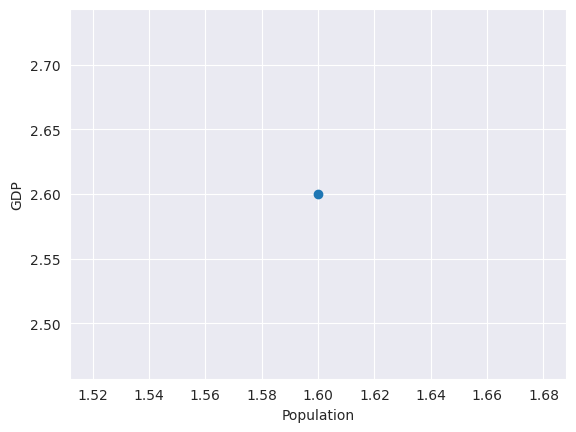

In [72]:
x=nrgvsecon['solar']
y=nrgvsecon['wind']

plt.xlabel('Population')
plt.ylabel('GDP')
plt.scatter(x,y);

In [74]:
 !jupyter nbconvert exploreafnrgvsec-exercise (Victor Ashioya).ipynb --to pdf

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `jupyter nbconvert exploreafnrgvsec-exercise (Victor Ashioya).ipynb --to pdf'


This should more/less be similar to the plot we saw for income vs energy use per person!